MODEL

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['League', 'Division', 'NewLeague', 'Salary'], axis=1).astype('float')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [69]:
X

array([[-0.6029005 , -0.59567545, -0.5285512 , ...,  1.05875764,
         0.98116592,  1.07505242],
       [ 0.51254171,  0.49225957,  0.72996619, ..., -0.94450322,
         0.98116592, -0.9301872 ],
       [ 0.62816682,  0.73648988,  0.95878753, ...,  1.05875764,
        -1.01919561,  1.07505242],
       ...,
       [ 0.48533581,  0.40344855, -0.98619389, ..., -0.94450322,
         0.98116592, -0.9301872 ],
       [ 1.15188054,  0.80309815, -0.29972986, ..., -0.94450322,
        -1.01919561, -0.9301872 ],
       [ 1.54636621,  1.38036979, -0.29972986, ..., -0.94450322,
         0.98116592, -0.9301872 ]])

In [70]:
from sklearn.linear_model import Ridge

In [71]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)

In [72]:
ridge_model.coef_

array([-254.26179769,  382.61872062,   58.78413071,  -74.24130473,
        -49.5275995 ,  114.65979247,   33.79585995, -310.97624697,
        -58.02429954,  -22.99427312,  526.37283413,  188.51059442,
       -167.89247081,   73.05527989,   38.45705987,   -5.02302277,
         56.30356413,  -50.71582179,  -24.65567735])

In [73]:
lambdas = 10 ** np.linspace(10, -2, 100)*0.5
lambdas[:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

Text(0.5, 1.0, 'Ridge coefficients as a function of the regularization')

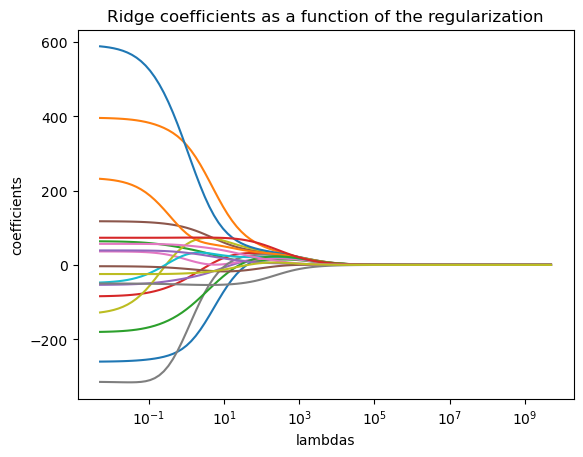

In [74]:
ridge_model = Ridge()
coefs = []
for i in lambdas:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train, y_train)
    coefs.append(ridge_model.coef_)

import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')

plt.xlabel('lambdas')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of the regularization')

PREDICTION

In [75]:
y_pred = ridge_model.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

357.0422837351675

Model Tuning

In [77]:
lambdas = 10 ** np.linspace(10, -2, 100)*0.5

In [78]:
lambdas[:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [79]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=lambdas, 
                   scoring="neg_mean_squared_error", 
                   )

In [80]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [81]:
ridge_cv.alpha_

152.69277544167062

In [82]:
ridge_tuned = Ridge(alpha=ridge_cv.alpha_).fit(X_train, y_train)

In [83]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.21498692309933